### HomeWork_Elvis_Selimaj_pymaceuticals_starter

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

# Hide warning messages in notebook
import warnings   
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"  

# Read the Mouse and Drug Data and the Clinical Trial Data 
mouse = pd.read_csv(mouse_data)
clinical = pd.read_csv(clinical_data)

# Combine the data into a single dataset 
mouse_clinical_data = pd.merge(mouse, clinical, on='Mouse ID')

# Display the data table for preview
mouse_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pd.pivot_table(mouse_clinical_data, values=['Tumor Volume (mm3)'], index=['Drug'], columns=['Timepoint'], aggfunc=np.mean)


# Convert to DataFrame

# Preview DataFrame


Tumor Volume (mm3)                                              \
Timepoint                 0          5          10         15         20   
Drug                                                                       
Capomulin               45.0  44.266086  43.084291  42.064317  40.716325   
Ceftamin                45.0  46.503051  48.285125  50.094055  52.157049   
Infubinol               45.0  47.062001  49.403909  51.296397  53.197691   
Ketapril                45.0  47.389175  49.582269  52.399974  54.920935   
Naftisol                45.0  46.796098  48.694210  50.933018  53.644087   
Placebo                 45.0  47.125589  49.423329  51.359742  54.364417   
Propriva                45.0  47.248967  49.101541  51.067318  53.346737   
Ramicane                45.0  43.944859  42.531957  41.495061  40.238325   
Stelasyn                45.0  47.527452  49.463844  51.529409  54.067395   
Zoniferol               45.0  46.851818  48.689881  50.779059  53.170334   

                                                                  
Timepoint         25         30         35         40         45  
Drug                                                              
Capomulin  39.939528  38.769339  37.816839  36.958001  36.236114  
Ceftamin   54.287674  56.769517  58.827548  61.467895  64.132421  
Infubinol  55.715252  58.299397  60.742461  63.162824  65.755562  
Ketapril   57.678982  60.994507  63.371686  66.068580  70.662958  
Naftisol   56.731968  59.559509  62.685087  65.600754  69.265506  
Placebo    57.482574  59.809063  62.420615  65.052675  68.084082  
Propriva   55.504138  58.196374  60.350199  63.045537  66.258529  
Ramicane   38.974300  38.703137  37.451996  36.574081  34.955595  
Stelasyn   56.166123  59.826738  62.440699  65.356386  68.438310  
Zoniferol  55.432935  57.713531  60.089372  62.916692  65.960888

In [4]:
groupby_drug_timeout = pd.DataFrame(mouse_clinical_data.groupby(['Drug', 'Timepoint']) ['Tumor Volume (mm3)'].mean()).reset_index()
groupby_drug_timeout.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupby_drug_timeout_stderror = pd.DataFrame(mouse_clinical_data.groupby(['Drug', 'Timepoint']) ['Tumor Volume (mm3)'].sem()).reset_index()


# Convert to DataFrame

# Preview DataFrame
groupby_drug_timeout_stderror



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
drug_reformat = pd.pivot_table(mouse_clinical_data, values=['Tumor Volume (mm3)'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)

# Preview that Reformatting worked
drug_reformat.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

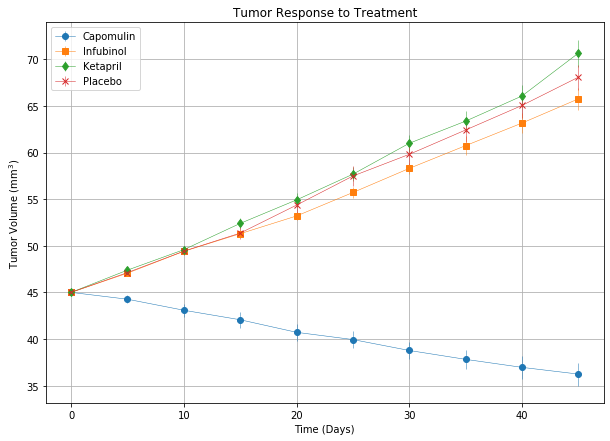

In [7]:
# Generate the Plot (with Error Bars)
x = drug_reformat.index.values

plt.figure(figsize=(10,7))

y1 = drug_reformat['Tumor Volume (mm3)']['Capomulin']
yerr1 = groupby_drug_timeout_stderror.loc[groupby_drug_timeout_stderror['Drug'] == 'Capomulin']['Tumor Volume (mm3)']
plt.errorbar(x, y1, yerr=yerr1, marker="o", linewidth=0.5, label='Capomulin')

y2 = drug_reformat['Tumor Volume (mm3)']['Infubinol']
yerr2 = groupby_drug_timeout_stderror.loc[groupby_drug_timeout_stderror['Drug'] == 'Infubinol']['Tumor Volume (mm3)']
plt.errorbar(x, y2, yerr=yerr2, marker="s", linewidth=0.5, label='Infubinol')

y3 = drug_reformat['Tumor Volume (mm3)']['Ketapril']
yerr3 = groupby_drug_timeout_stderror.loc[groupby_drug_timeout_stderror['Drug'] == 'Ketapril']['Tumor Volume (mm3)']
plt.errorbar(x, y3, yerr=yerr3, marker="d", linewidth=0.5, label='Ketapril' )

y4 = drug_reformat['Tumor Volume (mm3)']['Placebo']
yerr4 = groupby_drug_timeout_stderror.loc[groupby_drug_timeout_stderror['Drug'] == 'Placebo']['Tumor Volume (mm3)']
plt.errorbar(x, y4, yerr=yerr4, marker="x", linewidth=0.5, label='Placebo')

plt.legend()

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel(r'Tumor Volume (mm$^3$)')
plt.grid()

# Save the Figure 
plt.savefig('Tumor_plot1.jpg')

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_groupby = pd.DataFrame(mouse_clinical_data.groupby(['Drug', 'Timepoint']) ['Metastatic Sites'].mean()).reset_index()

# Convert to DataFrame

# Preview DataFrame
met_groupby.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_groupby_stderror = pd.DataFrame(mouse_clinical_data.groupby(['Drug', 'Timepoint']) ['Metastatic Sites'].sem()).reset_index()

# Convert to DataFrame

# Preview DataFrame
met_groupby_stderror.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
met_groupby_stderror_reformat = pd.pivot_table(mouse_clinical_data, values=['Metastatic Sites'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)

# Preview that Reformatting worked
met_groupby_stderror_reformat.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

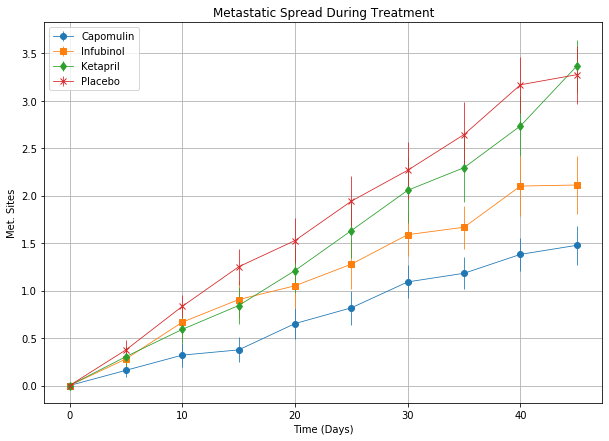

In [12]:
# Generate the Plot (with Error Bars). Save the Figure. Show the Figure.

# Generate the Plot (with Error Bars)
x = met_groupby_stderror_reformat.index.values

plt.figure(figsize=(10,7))

y1 = met_groupby_stderror_reformat['Metastatic Sites']['Capomulin']
yerr1 = met_groupby_stderror.loc[met_groupby_stderror['Drug'] == 'Capomulin']['Metastatic Sites']
plt.errorbar(x, y1, yerr=yerr1, marker="o", linewidth=0.8, label='Capomulin')

y2 = met_groupby_stderror_reformat['Metastatic Sites']['Infubinol']
yerr2 = met_groupby_stderror.loc[met_groupby_stderror['Drug'] == 'Infubinol']['Metastatic Sites']
plt.errorbar(x, y2, yerr=yerr2, marker="s", linewidth=0.8, label='Infubinol')

y3 = met_groupby_stderror_reformat['Metastatic Sites']['Ketapril']
yerr3 = met_groupby_stderror.loc[met_groupby_stderror['Drug'] == 'Ketapril']['Metastatic Sites']
plt.errorbar(x, y3, yerr=yerr3, marker="d", linewidth=0.8, label='Ketapril' )

y4 = met_groupby_stderror_reformat['Metastatic Sites']['Placebo']
yerr4 = met_groupby_stderror.loc[met_groupby_stderror['Drug'] == 'Placebo']['Metastatic Sites']
plt.errorbar(x, y4, yerr=yerr4, marker="x", linewidth=0.8, label='Placebo')

plt.legend()

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure 
plt.savefig('Met_plot2.jpg')


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric). 
# Convert to DataFrame
# Preview DataFrame

mice_groupby = pd.DataFrame(mouse_clinical_data.groupby(['Drug', 'Timepoint']) ['Mouse ID'].count()).reset_index()
mice_groupby = mice_groupby.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mice_groupby.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_groupby_reformat = pd.pivot_table(mouse_clinical_data, values=['Mouse ID'], index=['Timepoint'], columns=['Drug'], aggfunc=len)

# Preview the Data Frame
mice_groupby_reformat.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

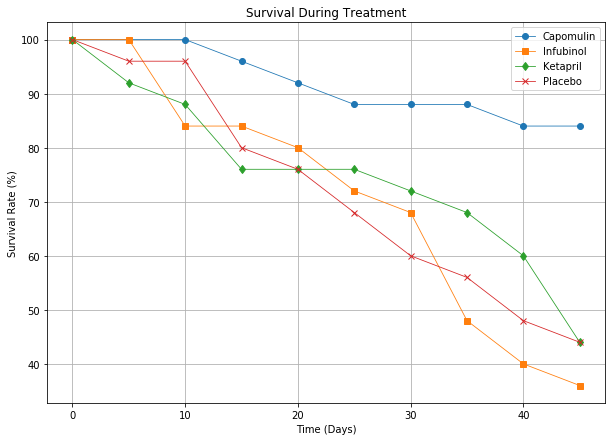

In [15]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

x = mice_groupby_reformat.index.values

plt.figure(figsize=(10,7))

y1 = mice_groupby_reformat['Mouse ID']['Capomulin']
y1 = y1/y1[0]*100
plt.plot(x, y1, marker="o", linewidth=0.8, label='Capomulin')

y2 = mice_groupby_reformat['Mouse ID']['Infubinol']
y2 = y2/y2[0]*100
plt.plot(x, y2,marker="s", linewidth=0.8, label='Infubinol')

y3 = mice_groupby_reformat['Mouse ID']['Ketapril']
y3 = y3/y3[0]*100
plt.plot(x, y3, marker="d", linewidth=0.8, label='Ketapril' )

y4 = mice_groupby_reformat['Mouse ID']['Placebo']
y4 = y4/y4[0]*100
plt.plot(x, y4, marker="x", linewidth=0.8, label='Placebo')

plt.legend()

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure 
plt.savefig('mice_plot3.jpg')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

#The percent change for each drug is the last values minus the
#first values which are all 45, divided by the starting values,
#which are 45, times 100. 

percent_change_vol = (drug_reformat.tail(1) - 45)/45*100
percent_change_vol=percent_change_vol['Tumor Volume (mm3)']
percent_change_vol = percent_change_vol.T
percent_change_vol[45]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

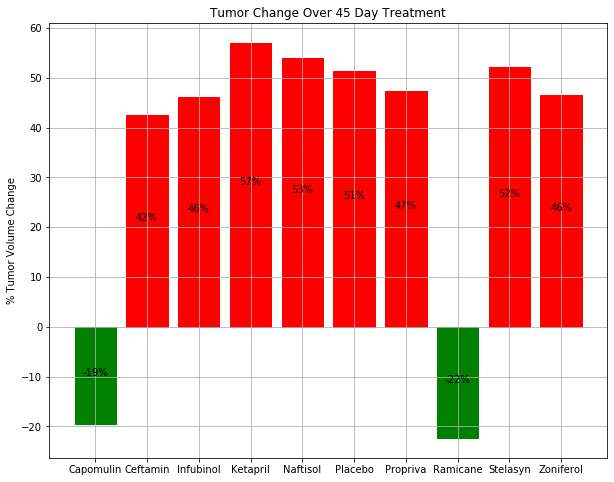

In [17]:
# Store all Relevant Percent Changes into a Tuple
percent_change_t = tuple(percent_change_vol[45])

# Splice the data between passing and failing drugs
[t for t in percent_change_t if t<0]
[t for t in percent_change_t if t>0]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
barlist = ax.bar(range(len(percent_change_t)),percent_change_t)

for n in range(len(percent_change_t)):
    y = percent_change_t[n]
    if y > 0:
        barlist[n].set_color('r')
    else: 
        barlist[n].set_color('g')
    x = n
    ax.text(x,y/2, "%d%%" % (y), ha='center') 

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
ax.set_xticks(np.arange(len(percent_change_t)))
ax.set_xticklabels(percent_change_vol[45].index.values)
plt.grid() 
plt.savefig('Tumor_Summary.jpg')

![Metastatic Spread During Treatment](../Images/change.png)

### Final out put_pymaceuticals_starter